In [ ]:
#cleaning cricket data string to numeric
import pandas as pd
df = pd.read_csv("/content/cricket_data.csv")

df['Highest_Score'] = df['Highest_Score'].str.replace('*', '', regex=False)

cols_to_convert = [
    'Year', 'Matches_Batted', 'Not_Outs', 'Runs_Scored', 'Highest_Score', 'Batting_Average',
    'Balls_Faced', 'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes',
    'Catches_Taken', 'Stumpings', 'Matches_Bowled', 'Balls_Bowled', 'Runs_Conceded',
    'Wickets_Taken', 'Bowling_Average', 'Economy_Rate', 'Bowling_Strike_Rate',
    'Four_Wicket_Hauls', 'Five_Wicket_Hauls'
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


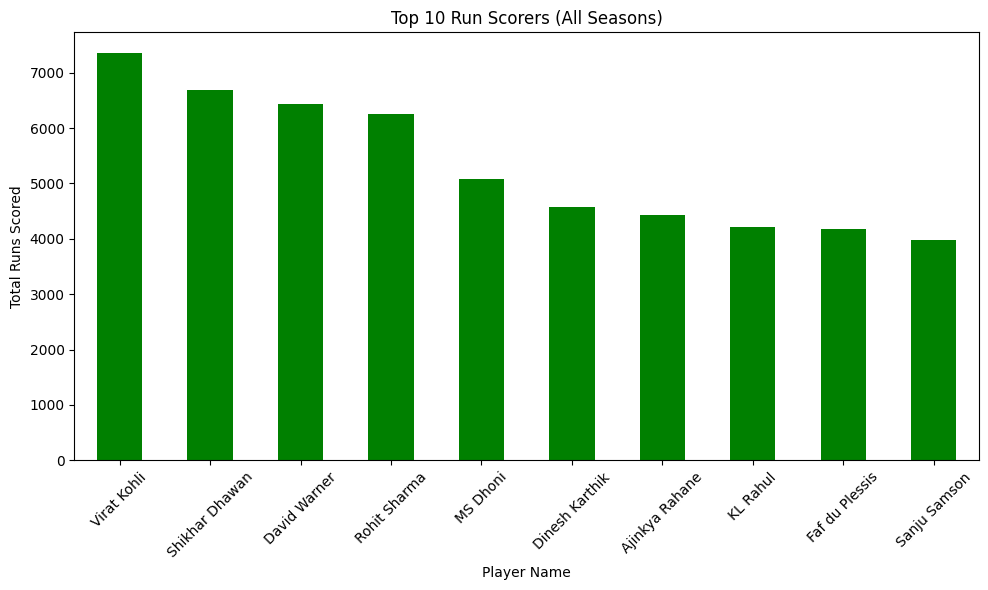

In [2]:
#plotting top 10 run scorers of all time
import matplotlib.pyplot as plt

top_run_scorers = df.groupby('Player_Name')['Runs_Scored'].sum().sort_values(ascending=False).head(10)

top_run_scorers.plot(kind='bar', figsize=(10, 6), color='green')
plt.title("Top 10 Run Scorers (All Seasons)")
plt.xlabel("Player Name")
plt.ylabel("Total Runs Scored")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


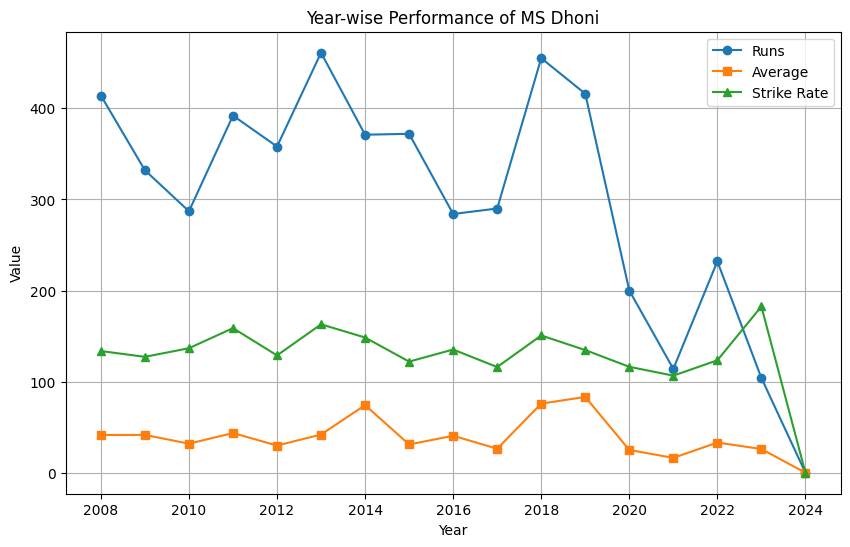

In [4]:
#player analysis(batting)
player = "MS Dhoni"
df_player = df[df['Player_Name'] == player].sort_values("Year")

plt.figure(figsize=(10, 6))
plt.plot(df_player['Year'], df_player['Runs_Scored'], marker='o', label='Runs')
plt.plot(df_player['Year'], df_player['Batting_Average'], marker='s', label='Average')
plt.plot(df_player['Year'], df_player['Batting_Strike_Rate'], marker='^', label='Strike Rate')

plt.title(f"Year-wise Performance of {player}")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


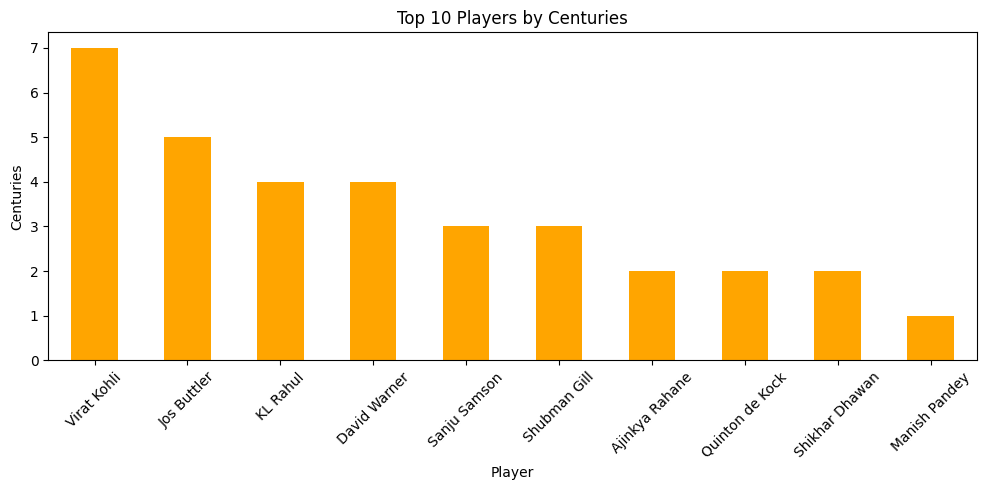

In [7]:
#top centurions of all time
top_centuries = df.groupby("Player_Name")["Centuries"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_centuries.plot(kind='bar', color='orange')
plt.title("Top 10 Players by Centuries")
plt.xlabel("Player")
plt.ylabel("Centuries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
#top 10 wicket takers of all time
df["Wickets_Taken"] = pd.to_numeric(df["Wickets_Taken"], errors='coerce')
top_wicket_takers = df.groupby("Player_Name")["Wickets_Taken"].sum().sort_values(ascending=False).head(10)

print("Top 10 Wicket Takers:")
print(top_wicket_takers)

Top 10 Wicket Takers:
Player_Name
Yuzvendra Chahal       188.0
Piyush Chawla          180.0
Amit Mishra            173.0
Ravichandran Ashwin    172.0
Bhuvneshwar Kumar      170.0
Sunil Narine           164.0
Ravindra Jadeja        152.0
Jasprit Bumrah         148.0
Rashid Khan            140.0
Umesh Yadav            138.0
Name: Wickets_Taken, dtype: float64


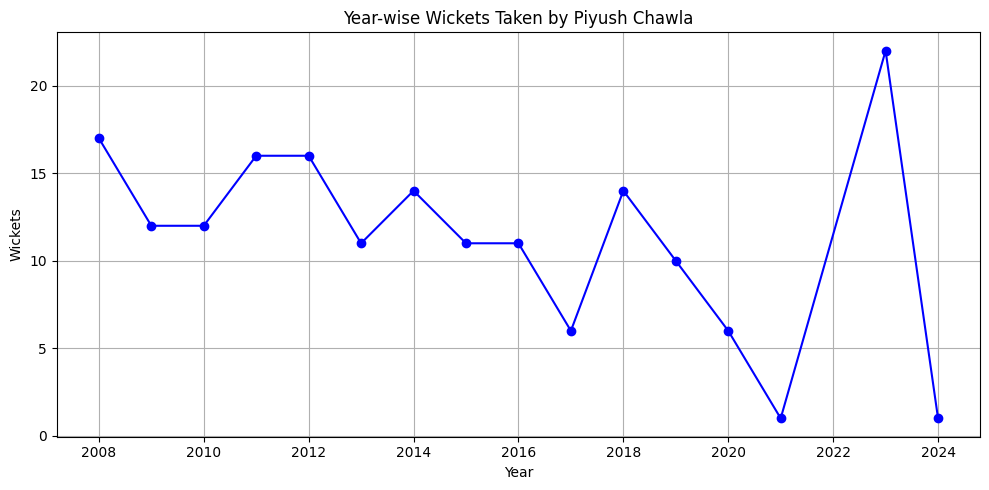

In [14]:
#bowler analysis
player = "Piyush Chawla"
df_bowler = df[df["Player_Name"] == player].sort_values("Year")

plt.figure(figsize=(10, 5))
plt.plot(df_bowler["Year"], df_bowler["Wickets_Taken"], marker='o', color='blue')
plt.title(f"Year-wise Wickets Taken by {player}")
plt.xlabel("Year")
plt.ylabel("Wickets")
plt.grid(True)
plt.tight_layout()
plt.show()
